In [1]:
!ls *.2pcf

79_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB10.margin30.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB120.margin60.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB240.margin80.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB30.margin30.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB60.margin45.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.rho-0.5.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.rho-0.8.150s0to150.120mu.zplus1000000000.2pcf
79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf


In [13]:
! wc -l 79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB10.margin30.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf


18001 79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB10.margin30.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf


In [34]:
import numpy as np
import matplotlib.pyplot as plt
def xis(filename, nums = 150, nummu = 120):
    data = np.loadtxt(filename)
    #print(data.shape)
    DDnorm, DRnorm, RRnorm = [float(xx) for xx in open(filename).readline().split()[1:]]
    DD, DR, RR = data[:,3].reshape((nums, nummu))/DDnorm, data[:,4].reshape((nums, nummu))/DRnorm, data[:,6].reshape((nums, nummu))/RRnorm
    xis = (DD.sum(1)-2*DR.sum(1)+RR.sum(1))/RR.sum(1)
    return xis

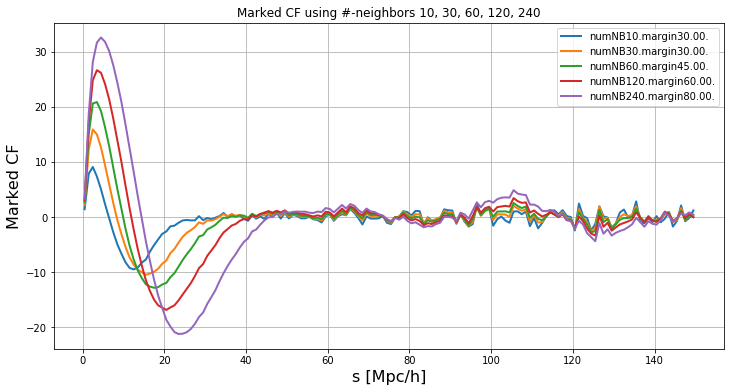

In [46]:
#filename = '79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB10.margin30.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf'
fig, ax = plt.subplots(figsize=(12,6))
for suffix in [
    'numNB10.margin30.00.',
    'numNB30.margin30.00.',
    'numNB60.margin45.00.',
    'numNB120.margin60.00.',
    'numNB240.margin80.00.',
]:
    filename = '79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.'+suffix+'rho-1.150s0to150.120mu.zplus1000000000.2pcf'
    y = xis(filename)
    
    X = np.linspace(0.5, 149.5, 150)
    ax.plot(X, X**2 * y, label=suffix, lw=2)
ax.grid()
ax.legend()
ax.set_xlabel('s [Mpc/h]', fontsize=16)
ax.set_ylabel('Marked CF', fontsize=16)
ax.set_title('Marked CF using #-neighbors 10, 30, 60, 120, 240')
fig.savefig('MCF_diff_NB.png', format='png')

In [17]:
!wc -l $filename

18001 79_nbar1e-3.shiftz.om0.3071_w-1.0000.radeczw.numNB10.margin30.00.rho-1.150s0to150.120mu.zplus1000000000.2pcf
